In [4]:
!pip install tweepy #a library that helps reaching the tweets.
!pip install textblob # a library that helps performing basic NLP tasks.


Requirement not upgraded as not directly required: tweepy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: PySocks>=1.5.7 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tweepy)
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tweepy)
Requirement not upgraded as not directly required: requests-oauthlib>=0.7.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tweepy)
Requirement not upgraded as not directly required: requests>=2.11.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tweepy)
Requirement not upgraded as not directly required: oauthlib>=3.0.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests-oauthlib>=0.7.0->tweepy)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from request

In [5]:
import tweepy  #Is a library that helps for development of twitter.
from textblob import TextBlob #TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. 
import json
import nltk  #Natural Language Toolkit - It provides easy-to-use interfaces to over 50 corpora and lexical resources.(classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers )
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Twitter API

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
#
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api2 = tweepy.API(auth) 

In [8]:
tweets = api.search("IBM",lang = "en")
tweets

{'search_metadata': {'completed_in': 0.123,
  'count': 15,
  'max_id': 1128994812022140928,
  'max_id_str': '1128994812022140928',
  'next_results': '?max_id=1128994050944765951&q=IBM&lang=en&include_entities=1',
  'query': 'IBM',
  'refresh_url': '?since_id=1128994812022140928&q=IBM&lang=en&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Thu May 16 12:05:13 +0000 2019',
   'entities': {'hashtags': [{'indices': [42, 54], 'text': 'CallforCode'},
     {'indices': [62, 72], 'text': 'IBMDevDay'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 3270778723,
      'id_str': '3270778723',
      'indices': [3, 15],
      'name': 'Priya Mallya',
      'screen_name': 'priyamallya'},
     {'id': 429724798,
      'id_str': '429724798',
      'indices': [18, 22],
      'name': 'RBS',
      'screen_name': 'RBS'},
     {'id': 2151274322,
      'id_str': '2151274322',
      'indices': [74, 87],

In [9]:
r = json.dumps(tweets) #convert into JSON
loaded_r = json.loads(r) #parse r to dictionary
loaded_r = loaded_r['statuses']
print(loaded_r)

[{'text': 'RT @priyamallya: \u2066@RBS\u2069 signs the MoU for #CallforCode at the #IBMDevDay \u2066@sugandhasrik\u2069 \u2066@gsharma_15\u2069 \u2066@ZarinDarashaw\u2069 \u2066@jokoester\u2069 \u2066@ibm_…', 'retweeted_status': {'text': '\u2066@RBS\u2069 signs the MoU for #CallforCode at the #IBMDevDay \u2066@sugandhasrik\u2069 \u2066@gsharma_15\u2069 \u2066@ZarinDarashaw\u2069 \u2066@jokoester\u2069… https://t.co/olKRzeHCfQ', 'retweet_count': 2, 'is_quote_status': False, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'possibly_sensitive': False, 'user': {'statuses_count': 439, 'geo_enabled': True, 'default_profile_image': False, 'contributors_enabled': False, 'notifications': False, 'entities': {'description': {'urls': []}, 'url': {'urls': [{'expanded_url': 'http://about.me/priyamallya', 'url': 'https://t.co/qjmFlxwKno', 'indices': [0, 23], 'display_url': 'about.me/priyamallya'}]}}, 'follow_request_sent': False, 'friends_count': 139, 'profile_sidebar_fill_color': '

In [10]:
datadf = pd.DataFrame(loaded_r)
datadf=datadf['text']
print(datadf[0])
print(datadf)

RT @priyamallya: ⁦@RBS⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦@sugandhasrik⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
0     RT @priyamallya: ⁦@RBS⁩ signs the MoU for #Cal...
1     User Experience Designer, IBM Design #creative...
2     User Experience Designer, IBM Design #creative...
3     User Experience Designer, IBM Design #creative...
4     IBM Graduate Program - Visual UX Designer (m/f...
5     RT @IABMInsight: Some broadcasters are already...
6     RT @JerryCuomo: #Blockchain is just a technolo...
7     RT @citizenIBM: 🚨ANNOUNCED🚨 at Tech for Good S...
8     RT @johndczerwinski: Ok, here's one for #Throw...
9     RT @orangebusiness: #VivaTech It is vital to "...
10    RT @NicolasViard: @DamienHeiss and @Inwiber at...
11    RT @IBMBenelux: P4A teams up with IBM on #Wats...
12    RT @Chlalande: @Inwiber @Scale_Zone live on st...
Name: text, dtype: object


In [11]:
## removing the tweets which have @user in them.
def remove_pattern(input_txt, pattern): #with this function we remove @user in tweets.
    r = re.findall(pattern, input_txt) #findall function finds the patterns which are inside in tweets.
    #print(r)
    for i in r:
        input_txt = re.sub(i, '', input_txt) #this for loop changes @user expressions with space.
        print(input_txt)
        
    return input_txt

In [12]:
datadf = datadf.to_frame()
datadf
datadf2 = datadf

In [13]:
datadf2['new_tweet'] = np.vectorize(remove_pattern)(datadf2['text'], "@[\w]*")
datadf2['new_tweet'] = np.vectorize(remove_pattern)(datadf2['new_tweet'], "RT :")
datadf2

RT : ⁦@RBS⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦@sugandhasrik⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦@sugandhasrik⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦⁩ ⁦⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦⁩ ⁦⁩ ⁦…
RT : ⁦@RBS⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦@sugandhasrik⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦@sugandhasrik⁩ ⁦@gsharma_15⁩ ⁦@ZarinDarashaw⁩ ⁦@jokoester⁩ ⁦@ibm_…
RT : ⁦⁩ signs the MoU for #CallforCode at t

,text,new_tweet
0,RT @priyamallya: ⁦@RBS⁩ signs the MoU for #Cal...,⁦⁩ signs the MoU for #CallforCode at the #IBM...
1,"User Experience Designer, IBM Design #creative...","User Experience Designer, IBM Design #creative..."
2,"User Experience Designer, IBM Design #creative...","User Experience Designer, IBM Design #creative..."
3,"User Experience Designer, IBM Design #creative...","User Experience Designer, IBM Design #creative..."
4,IBM Graduate Program - Visual UX Designer (m/f...,IBM Graduate Program - Visual UX Designer (m/f...
5,RT @IABMInsight: Some broadcasters are already...,Some broadcasters are already making use of A...
6,RT @JerryCuomo: #Blockchain is just a technolo...,#Blockchain is just a technology. It does no...
7,RT @citizenIBM: 🚨ANNOUNCED🚨 at Tech for Good S...,🚨ANNOUNCED🚨 at Tech for Good Summit expandin...
8,"RT @johndczerwinski: Ok, here's one for #Throw...","Ok, here's one for #ThrowbackThursday! Who r..."
9,"RT @orangebusiness: #VivaTech It is vital to ""...","#VivaTech It is vital to ""use #AI to improve ..."


In [14]:
datadf2 = datadf2['new_tweet']

In [15]:
datadf2 = datadf2.to_frame()
datadf2

,new_tweet
0,⁦⁩ signs the MoU for #CallforCode at the #IBM...
1,"User Experience Designer, IBM Design #creative..."
2,"User Experience Designer, IBM Design #creative..."
3,"User Experience Designer, IBM Design #creative..."
4,IBM Graduate Program - Visual UX Designer (m/f...
5,Some broadcasters are already making use of A...
6,#Blockchain is just a technology. It does no...
7,🚨ANNOUNCED🚨 at Tech for Good Summit expandin...
8,"Ok, here's one for #ThrowbackThursday! Who r..."
9,"#VivaTech It is vital to ""use #AI to improve ..."


In [16]:
datadf2['new_tweet'] = datadf2['new_tweet'].str.replace("[^a-zA-Z#]", " ") #removing special characters

In [17]:
datadf2['new_tweet'] = datadf2['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing short words

In [18]:
datadf2.head()

,new_tweet
0,signs #CallforCode #IBMDevDay
1,User Experience Designer Design #creativejobs ...
2,User Experience Designer Design #creativejobs ...
3,User Experience Designer Design #creativejobs ...
4,Graduate Program Visual Designer Design #creat...


In [19]:
#tokenization
#tokenization means splitting every words from the sentences.
tokenized_tweet = datadf2['new_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                    [signs, #CallforCode, #IBMDevDay]
1    [User, Experience, Designer, Design, #creative...
2    [User, Experience, Designer, Design, #creative...
3    [User, Experience, Designer, Design, #creative...
4    [Graduate, Program, Visual, Designer, Design, ...
Name: new_tweet, dtype: object

In [20]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                      [sign, #callforcod, #ibmdevday]
1    [user, experi, design, design, #creativejob, #...
2    [user, experi, design, design, #creativejob, #...
3    [user, experi, design, design, #creativejob, #...
4    [graduat, program, visual, design, design, #cr...
Name: new_tweet, dtype: object

In [21]:
#with these cell we join the words from previous steps and change it from the new tweet part.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

datadf2['new_tweet'] = tokenized_tweet

In [22]:
!pip install wordcloud
#wordcloud is exploring text data and making your report more lively.It is an visual tool to see the words in text.

Requirement not upgraded as not directly required: wordcloud in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


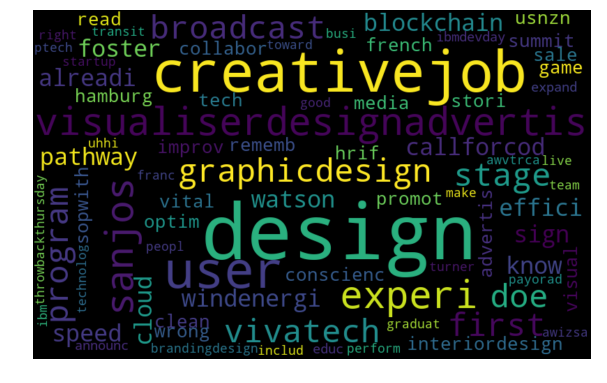

In [23]:
#wordcloud-Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in datadf2['new_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# function to collect hashtags-Understanding the impact of Hashtags on tweets sentiment
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i) #findall function finds the patterns which are inside in tweets.
        hashtags.append(ht)

    return hashtags

In [25]:
# extracting hashtags from tweets

HT_regular = hashtag_extract(datadf2['new_tweet'])

HT_regular = sum(HT_regular,[])
HT_regular

['callforcod',
 'ibmdevday',
 'creativejob',
 'sanjos',
 'graphicdesign',
 'visualiserdesignadvertis',
 'creativejob',
 'sanjos',
 'graphicdesign',
 'visualiserdesignadvertis',
 'creativejob',
 'sanjos',
 'visualiserdesignadvertis',
 'interiordesign',
 'creativejob',
 'hamburg',
 'brandingdesign',
 'blockchain',
 'throwbackthursday',
 'ibm',
 'do',
 'vivatech',
 'vivatech',
 'startup',
 'watson',
 'cloud',
 'windenergi']

In [26]:
#Tweets of Company
a = nltk.FreqDist(HT_regular)
print(a)


<FreqDist with 18 samples and 27 outcomes>


In [27]:
#calculate the frequency of words
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
print(d)


    Count                   Hashtag
0       1                blockchain
1       1                        do
2       1                callforcod
3       1                     cloud
4       1            interiordesign
5       1                    watson
6       1            brandingdesign
7       3                    sanjos
8       2                  vivatech
9       3  visualiserdesignadvertis
10      1                windenergi
11      4               creativejob
12      1                       ibm
13      1                   hamburg
14      2             graphicdesign
15      1         throwbackthursday
16      1                   startup
17      1                 ibmdevday


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


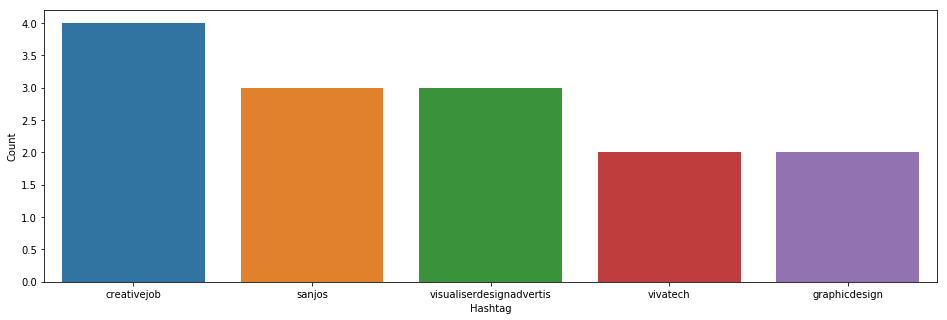

In [28]:
# selecting top 5 most frequent hashtags     
d = d.nlargest(columns="Count", n = 5) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

##TextBlob

In [29]:
from textblob import TextBlob

In [30]:
#type(datadf)
datadftext = datadf.iloc[:,1:2]
datadftext


,new_tweet
0,⁦⁩ signs the MoU for #CallforCode at the #IBM...
1,"User Experience Designer, IBM Design #creative..."
2,"User Experience Designer, IBM Design #creative..."
3,"User Experience Designer, IBM Design #creative..."
4,IBM Graduate Program - Visual UX Designer (m/f...
5,Some broadcasters are already making use of A...
6,#Blockchain is just a technology. It does no...
7,🚨ANNOUNCED🚨 at Tech for Good Summit expandin...
8,"Ok, here's one for #ThrowbackThursday! Who r..."
9,"#VivaTech It is vital to ""use #AI to improve ..."


In [31]:
datadftext.set_index('new_tweet', inplace=True)



In [32]:
datadftextblob = TextBlob(str(datadftext))
datadftextblob = datadftextblob.replace('Empty DataFrame', '')
datadftextblob = datadftextblob.replace('Columns: []', '')
datadftextblob = datadftextblob.replace('Index: [', '')
datadftextblob = datadftextblob.replace(']', '')
datadftextblob

TextBlob("

 ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦⁩ ⁦⁩ ⁦…, User Experience Designer, IBM Design #creativejobs #SanJose #GraphicDesigner #VisualiserDesignAdvertising… https://t.co/X8vW7wrE6c, User Experience Designer, IBM Design #creativejobs #SanJose #GraphicDesigner #VisualiserDesignAdvertising… https://t.co/hRIf29N7oo, User Experience Designer, IBM Design #creativejobs #SanJose #VisualiserDesignAdvertising #InteriorDesigner… https://t.co/PayorAD3tK, IBM Graduate Program - Visual UX Designer (m/f/x), IBM Design #creativejobs #Hamburg #BrandingDesigner… https://t.co/aWizsAE9yP,  Some broadcasters are already making use of AI for optimizing advertising sales. Turner was the first broadcast and media…,  #Blockchain is just a technology.  It does not have a conscience. And does not know right from wrong.  It’s how people use…,  🚨ANNOUNCED🚨 at Tech for Good Summit  expanding  educational programs in France to include the first French PTECH  (…,  Ok, here's one for #Th

In [33]:
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /home/dsxuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
datadftextblob.words

WordList(['\u2066\u2069', 'signs', 'the', 'MoU', 'for', 'CallforCode', 'at', 'the', 'IBMDevDay', '\u2066\u2069', '\u2066\u2069', '\u2066\u2069', '\u2066\u2069', '\u2066…', 'User', 'Experience', 'Designer', 'IBM', 'Design', 'creativejobs', 'SanJose', 'GraphicDesigner', 'VisualiserDesignAdvertising…', 'https', 't.co/X8vW7wrE6c', 'User', 'Experience', 'Designer', 'IBM', 'Design', 'creativejobs', 'SanJose', 'GraphicDesigner', 'VisualiserDesignAdvertising…', 'https', 't.co/hRIf29N7oo', 'User', 'Experience', 'Designer', 'IBM', 'Design', 'creativejobs', 'SanJose', 'VisualiserDesignAdvertising', 'InteriorDesigner…', 'https', 't.co/PayorAD3tK', 'IBM', 'Graduate', 'Program', 'Visual', 'UX', 'Designer', 'm/f/x', 'IBM', 'Design', 'creativejobs', 'Hamburg', 'BrandingDesigner…', 'https', 't.co/aWizsAE9yP', 'Some', 'broadcasters', 'are', 'already', 'making', 'use', 'of', 'AI', 'for', 'optimizing', 'advertising', 'sales', 'Turner', 'was', 'the', 'first', 'broadcast', 'and', 'media…', 'Blockchain', 'is

In [35]:
datadftextblob.sentences

[Sentence("
 
  ⁦⁩ signs the MoU for #CallforCode at the #IBMDevDay ⁦⁩ ⁦⁩ ⁦⁩ ⁦⁩ ⁦…, User Experience Designer, IBM Design #creativejobs #SanJose #GraphicDesigner #VisualiserDesignAdvertising… https://t.co/X8vW7wrE6c, User Experience Designer, IBM Design #creativejobs #SanJose #GraphicDesigner #VisualiserDesignAdvertising… https://t.co/hRIf29N7oo, User Experience Designer, IBM Design #creativejobs #SanJose #VisualiserDesignAdvertising #InteriorDesigner… https://t.co/PayorAD3tK, IBM Graduate Program - Visual UX Designer (m/f/x), IBM Design #creativejobs #Hamburg #BrandingDesigner… https://t.co/aWizsAE9yP,  Some broadcasters are already making use of AI for optimizing advertising sales."),
 Sentence("Turner was the first broadcast and media…,  #Blockchain is just a technology."),
 Sentence("It does not have a conscience."),
 Sentence("And does not know right from wrong."),
 Sentence("It’s how people use…,  🚨ANNOUNCED🚨 at Tech for Good Summit  expanding  educational programs in France to in

In [36]:
tweetssentiment = api2.search("elonmusk",lang = "en")
tweetssentiment

[Status(text='RT @BenjaminEnfield: A flyby of the Earth at night, seen from the International Space Station. \nA view I one day hope to see.... @elonmusk…', retweet_count=29, is_quote_status=False, metadata={'iso_language_code': 'en', 'result_type': 'recent'}, favorite_count=0, in_reply_to_screen_name=None, in_reply_to_user_id_str=None, user=User(statuses_count=39321, profile_background_color='C0DEED', follow_request_sent=False, profile_background_tile=True, profile_sidebar_border_color='C0DEED', is_translator=False, favourites_count=18078, created_at=datetime.datetime(2011, 9, 16, 8, 44, 59), following=False, id_str='374418260', utc_offset=None, url=None, profile_link_color='0084B4', protected=False, verified=False, _api=<tweepy.api.API object at 0x7f228f5c1780>, profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', default_profile=False, name='*Sean Cory', has_extended_profile=False, listed_count=7, profile_image_url='http://pbs.twimg.com/profile_images/675

In [37]:
#Number of times this Tweet has been retweeted.
for tweet in tweetssentiment:
    print("Retweeted Counts:", tweet.retweet_count)

Retweeted Counts: 29
Retweeted Counts: 0
Retweeted Counts: 6
Retweeted Counts: 0
Retweeted Counts: 30
Retweeted Counts: 0
Retweeted Counts: 0
Retweeted Counts: 2
Retweeted Counts: 0
Retweeted Counts: 1
Retweeted Counts: 33
Retweeted Counts: 0


In [38]:
for tweet in tweetssentiment:
    print("Favorited Counts:", tweet.favorite_count)

Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0
Favorited Counts: 0


In [39]:
##Language
for tweet in tweetssentiment:
    print("Language:", tweet.lang)

Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en
Language: en


In [40]:
for tweet in tweetssentiment:
    print(tweet.created_at)

2019-05-16 12:06:15
2019-05-16 12:05:53
2019-05-16 12:05:40
2019-05-16 12:05:07
2019-05-16 12:04:51
2019-05-16 12:04:49
2019-05-16 12:04:44
2019-05-16 12:04:02
2019-05-16 12:03:39
2019-05-16 12:03:34
2019-05-16 12:03:33
2019-05-16 12:03:30


In [41]:
for tweet in tweetssentiment:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       print('Positive')
    elif analysis.sentiment[0]<0:
       print('Negative')
    else:
       print('Neutral')
    

RT @BenjaminEnfield: A flyby of the Earth at night, seen from the International Space Station. 
A view I one day hope to see.... @elonmusk…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@SpaceX @elonmusk Sounds made up
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @b0yle: Backed by @elonmusk, Global Learning @xprize splits $10M between two #edtech teams: https://t.co/OZ06fsONoU Congrats to @kitkits…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@elonmusk @SpaceX Your vision driving the future of space👍🏻
Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @PeterHDiamandis: Thank you to @elonmusk for funding the $15 million #GlobalLearning @xprize. 

Very proud we were able to leverage his…
Sentiment(polarity=0.75, subjectivity=0.8125)
Positive
@marciadorsey Good morning #grandmotherofTwitter🌀 🙏🏽

cc @sqcrypto @biz @crypto @technology @jack @Square @CashApp… https://t.co/2g9Ite1d0I
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Positive
@elonmusk @SpaceX Elon;

In [42]:
list1 = []
for tweet in tweetssentiment:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       list1.append('Positive')
    elif analysis.sentiment[0]<0:
       list1.append('Negative')
    else:
       list1.append('Neutral')
print(list1)
print(len(list1))

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Positive']
12


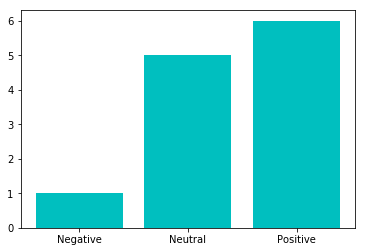

In [43]:
import matplotlib.pyplot as plt
import numpy as np

keys, counts = np.unique(list1, return_counts=True)

plt.bar(keys, counts,color='c')
plt.show()

In [44]:
#PersonalTweets

In [45]:
personaltweets = api.user_timeline("elonmusk",lang="en")
personaltweets
a = json.dumps(personaltweets)
loaded_a = json.loads(a)
#loaded_a = loaded_a['text']
#print(loaded_a)
datadfpersonal = pd.DataFrame(loaded_a)
datadfpersonal=datadfpersonal['text']
#print(datadfpersonal[0])
print(datadfpersonal)

0     RT @SpaceX: Standing down today due to excess ...
1     6 more launches of 60 🛰 for initial activation...
2     Starlink mission will be heaviest @SpaceX payl...
3     RT @SpaceX: The booster supporting this missio...
4     RT @SpaceX: All systems and weather are go ahe...
5                                      @jeff_foust 🏴‍☠️
6     @Alejandro_DebH @bluemoondance74 @space_terp @...
7     @Erdayastronaut @NASASpaceflight Probably star...
8     @bluemoondance74 @space_terp @NASASpaceflight ...
9     @Erdayastronaut @NASASpaceflight The opposite....
10    @space_terp @NASASpaceflight Both sites will m...
11    @NASASpaceflight SpaceX is doing simultaneous ...
12    @kurtybot @Tesla A lot, but you can’t count on...
13    RT @SpaceX: Static fire test of Falcon 9 compl...
14                        @macodiseas @oha_alex Exactly
15                              @oha_alex It’s a factor
16    RT @wonderofscience: This is what it would loo...
17     GoT season finale leaked https://t.co/wMo

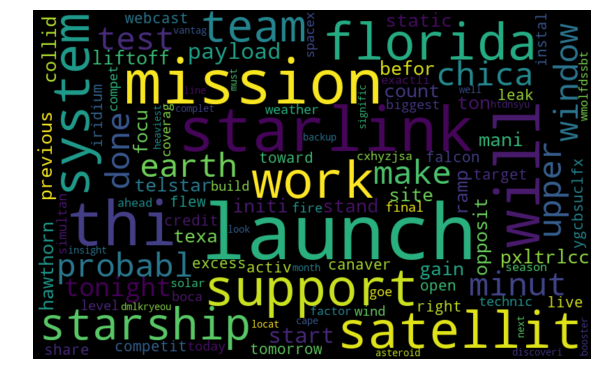

In [46]:
## removing the tweets which have @user in them.
def remove_pattern(input_txt, pattern): #with this function we remove @user in tweets.
    r = re.findall(pattern, input_txt) #findall function finds the patterns which are inside in tweets.
    #print(r)
    for i in r:
        input_txt = re.sub(i, '', input_txt) #this for loop changes @user expressions with space.
        #print(input_txt)
        
    return input_txt
datadfpersonal = datadfpersonal.to_frame()
datadfpersonal2 = datadfpersonal
datadfpersonal2['new_tweet'] = np.vectorize(remove_pattern)(datadfpersonal2['text'], "@[\w]*")
datadfpersonal2['new_tweet'] = np.vectorize(remove_pattern)(datadfpersonal2['new_tweet'], "RT :")
datadfpersonal2

datadfpersonal2 = datadfpersonal2['new_tweet']
datadfpersonal2 = datadfpersonal2.to_frame()
datadfpersonal2
datadfpersonal2['new_tweet'] = datadfpersonal2['new_tweet'].str.replace("[^a-zA-Z#]", " ")
datadfpersonal2['new_tweet'] = datadfpersonal2['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
datadfpersonal2.head()
#tokenization
#tokenization means splitting every words from the sentences.
tokenized_tweet = datadfpersonal2['new_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
#with these cell we join the words from previous steps and change it from the tidy tweet part.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

datadfpersonal2['new_tweet'] = tokenized_tweet
#wordcloud-Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in datadfpersonal2['new_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [47]:
personaltweets = api2.user_timeline("elonmusk",lang="en")


In [48]:
for tweet in personaltweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       print('Positive')
    elif analysis.sentiment[0]<0:
       print('Negative')
    else:
       print('Neutral')

RT @SpaceX: Standing down today due to excess upper level winds. Teams are working toward tomorrow's backup launch window, which opens at 1…
Sentiment(polarity=-0.09351851851851851, subjectivity=0.22129629629629632)
Negative
6 more launches of 60 🛰 for initial activation, 12 for significant coverage
Sentiment(polarity=0.2916666666666667, subjectivity=0.4583333333333333)
Positive
Starlink mission will be heaviest @SpaceX payload ever at 18.5 tons. If all goes well, each launch of 60 satellites… https://t.co/pxltrlCc9N
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SpaceX: The booster supporting this mission previously flew in support of the Telstar 18 VANTAGE and Iridium-8 missions https://t.co/Uz…
Sentiment(polarity=0.04166666666666667, subjectivity=0.20833333333333331)
Positive
RT @SpaceX: All systems and weather are go ahead of tonight’s launch of Starlink; webcast will go live about 15 minutes before liftoff → ht…
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Posi

['Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral']
20


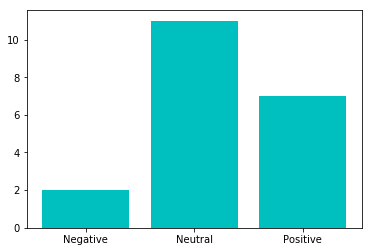

In [49]:
list1 = []
for tweet in personaltweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       list1.append('Positive')
    elif analysis.sentiment[0]<0:
       list1.append('Negative')
    else:
       list1.append('Neutral')
print(list1)
print(len(list1))

import matplotlib.pyplot as plt
import numpy as np

keys, counts = np.unique(list1, return_counts=True)

plt.bar(keys, counts,color='c')
plt.show()